In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
df1 = pd.read_csv(r"C:\Users\Acer\Desktop\HDFC_Internship\DATA\Fraud_Data_Final.csv")

In [3]:
df1.shape

(73385, 9)

In [4]:
df1.size

660465

In [5]:
df1.head()

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
0,0,1653444,2018-09-20 11:49:41,0,Hotels,88.11,14903381,172,0
1,1,1657926,2018-09-20 20:21:57,0,Grocery,78.25,14934117,172,0
2,2,1174679,2018-08-01 12:11:36,0,Airways,62.28,10584696,122,0
3,3,1175894,2018-08-01 13:58:40,0,Airways,80.16,10591120,122,0
4,4,758479,2018-06-19 4:18:11,0,Insulation,90.07,6841091,79,0


In [6]:
df1.tail()

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
73380,38095,903947,2018-07-04 7:55:16,2015,Retail,63.03,8150116,94,0
73381,38096,243562,2018-04-26 10:24:24,2015,Retail,45.23,2197464,25,0
73382,38098,773468,2018-06-20 13:49:15,2015,Retail,31.59,6961755,80,0
73383,38100,1177522,2018-08-01 16:44:45,2016,Retail,27.61,10601085,122,0
73384,38101,948456,2018-07-08 17:53:44,2016,Retail,11.41,8531624,98,0


In [7]:
df1.describe(include='all')

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
count,73385.000000,7.338500e+04,73385,73385.000000,73385,73385.000000,7.338500e+04,73385.000000,73385.000000
unique,NaN,NaN,70904,NaN,10,NaN,NaN,NaN,NaN
top,NaN,NaN,2018-04-05 13:03:35,NaN,Insulation,NaN,NaN,NaN,NaN
freq,NaN,NaN,4,NaN,9512,NaN,NaN,NaN,NaN
mean,41048.878204,8.233976e+05,NaN,2173.954514,NaN,55.177761,7.419868e+06,85.383307,0.008939
std,26492.483939,5.479239e+05,NaN,1409.347516,NaN,43.472514,4.939476e+06,57.169018,0.094124
min,0.000000,6.295000e+03,NaN,0.000000,NaN,0.000000,5.153000e+04,0.000000,0.000000
25%,18346.000000,4.632880e+05,NaN,967.000000,NaN,21.790000,4.177458e+06,48.000000,0.000000
50%,36692.000000,7.594650e+05,NaN,1941.000000,NaN,46.030000,6.850855e+06,79.000000,0.000000
75%,63533.000000,1.347494e+06,NaN,3334.000000,NaN,78.990000,1.214317e+07,140.000000,0.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73385 entries, 0 to 73384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SERIAL NUMBER                 73385 non-null  int64  
 1   TRANSACTION_ID                73385 non-null  int64  
 2   DATETIME                      73385 non-null  object 
 3   CUSTOMER_ID                   73385 non-null  int64  
 4   TYPE of TRANSACTION           73385 non-null  object 
 5   TRASCATION AMOUNT             73385 non-null  float64
 6   TIME_SECONDS                  73385 non-null  int64  
 7   DAYS_SINCE_FIRST_TRANSACTION  73385 non-null  int64  
 8   FRAUD                         73385 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.0+ MB


In [9]:
df1.isnull().sum()

SERIAL NUMBER                   0
TRANSACTION_ID                  0
DATETIME                        0
CUSTOMER_ID                     0
TYPE of TRANSACTION             0
TRASCATION AMOUNT               0
TIME_SECONDS                    0
DAYS_SINCE_FIRST_TRANSACTION    0
FRAUD                           0
dtype: int64

In [10]:
df1.dtypes.value_counts()

int64      6
object     2
float64    1
dtype: int64

In [11]:
df1 = df1.drop(["SERIAL NUMBER","TRANSACTION_ID"], axis = 1)

In [12]:
df1['FRAUD'].value_counts(normalize=True)

0    0.991061
1    0.008939
Name: FRAUD, dtype: float64

In [13]:
df1['TYPE of TRANSACTION'].value_counts().count()

10

In [14]:
df1['TYPE of TRANSACTION'].value_counts()

Insulation     9512
Food           9211
Electronics    7931
Clothing       7394
Grocery        7115
Retail         7000
Footwear       6621
Airways        6584
Hotels         6086
Rental Car     5931
Name: TYPE of TRANSACTION, dtype: int64

In [15]:
df1['TYPE of TRANSACTION'][df1["FRAUD"] == 1].value_counts()

Food           107
Insulation      91
Electronics     77
Retail          73
Airways         66
Hotels          65
Grocery         63
Footwear        51
Rental Car      42
Clothing        21
Name: TYPE of TRANSACTION, dtype: int64

In [16]:
df1['TYPE of TRANSACTION'][df1["FRAUD"] == 0].value_counts()

Insulation     9421
Food           9104
Electronics    7854
Clothing       7373
Grocery        7052
Retail         6927
Footwear       6570
Airways        6518
Hotels         6021
Rental Car     5889
Name: TYPE of TRANSACTION, dtype: int64

In [17]:
df1['CUSTOMER_ID'].value_counts().count()

3456

In [18]:
df1['CUSTOMER_ID'].value_counts()

1848    57
571     57
1157    57
98      56
1881    55
        ..
2288     1
2145     1
4917     1
2023     1
1896     1
Name: CUSTOMER_ID, Length: 3456, dtype: int64

In [19]:
df1['CUSTOMER_ID'][df1["FRAUD"] == 1].value_counts()

1692    5
613     5
701     5
1085    5
1743    5
       ..
1719    1
1708    1
1706    1
1693    1
1992    1
Name: CUSTOMER_ID, Length: 536, dtype: int64

In [20]:
df1['CUSTOMER_ID'][df1["FRAUD"] == 0].value_counts()

571     57
1848    57
1157    57
98      56
1881    55
        ..
2357     1
2288     1
2145     1
4917     1
1896     1
Name: CUSTOMER_ID, Length: 3455, dtype: int64

In [21]:
df1["TYPE of TRANSACTION"][df1["FRAUD"] == 1].value_counts(normalize=True)

Food           0.163110
Insulation     0.138720
Electronics    0.117378
Retail         0.111280
Airways        0.100610
Hotels         0.099085
Grocery        0.096037
Footwear       0.077744
Rental Car     0.064024
Clothing       0.032012
Name: TYPE of TRANSACTION, dtype: float64

In [22]:
df1["TYPE of TRANSACTION"][df1["FRAUD"] == 0].value_counts(normalize=True)

Insulation     0.129536
Food           0.125177
Electronics    0.107990
Clothing       0.101376
Grocery        0.096963
Retail         0.095244
Footwear       0.090335
Airways        0.089620
Hotels         0.082787
Rental Car     0.080972
Name: TYPE of TRANSACTION, dtype: float64

In [23]:
df1.head()

,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
0,2018-09-20 11:49:41,0,Hotels,88.11,14903381,172,0
1,2018-09-20 20:21:57,0,Grocery,78.25,14934117,172,0
2,2018-08-01 12:11:36,0,Airways,62.28,10584696,122,0
3,2018-08-01 13:58:40,0,Airways,80.16,10591120,122,0
4,2018-06-19 4:18:11,0,Insulation,90.07,6841091,79,0


In [24]:
classes=df1['FRAUD'].value_counts()
normal_share=round(classes[0]/df1['FRAUD'].count()*100,2)
fraud_share=round(classes[1]/df1['FRAUD'].count()*100, 2)
normal_share, fraud_share

(99.11, 0.89)

In [25]:
classes

0    72729
1      656
Name: FRAUD, dtype: int64

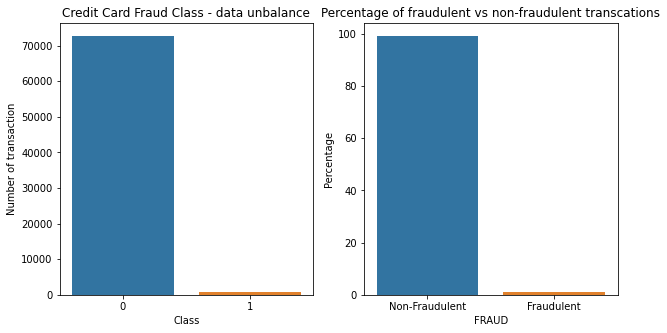

In [26]:
# bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = df1["FRAUD"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'FRAUD':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x=df_fraud_percentage['FRAUD'], y=df_fraud_percentage['Percentage'])
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

In [27]:
counts = df1['CUSTOMER_ID'][df1["FRAUD"] == 0].value_counts()

df= df1[    (df1['CUSTOMER_ID'].isin(counts[counts > 5].index)) | (df1["FRAUD"] == 1)   ]

# df = df1

In [28]:
classes=df['FRAUD'].value_counts()
normal_share=round(classes[0]/df['FRAUD'].count()*100,2)
fraud_share=round(classes[1]/df['FRAUD'].count()*100, 2)
normal_share, fraud_share

(99.1, 0.9)

In [29]:
df["FRAUD"].value_counts()

0    71846
1      656
Name: FRAUD, dtype: int64

In [30]:
df1["FRAUD"].value_counts()

0    72729
1      656
Name: FRAUD, dtype: int64

In [31]:
# drop unnecessary columns
# df = df.drop("SERIAL NUMBER", axis = 1)
df = df.drop("TIME_SECONDS", axis = 1)

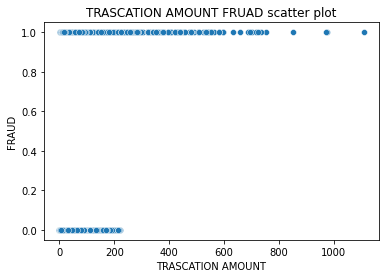

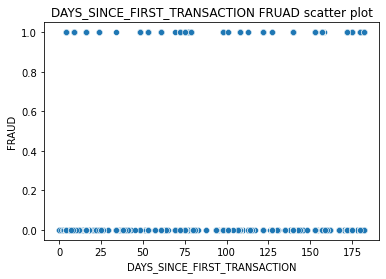

In [32]:
features = [ 'TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    sns.scatterplot(x = df[f], y = df["FRAUD"])
    title = f + " FRUAD scatter plot"
    plt.title(title)
    plt.show()
    

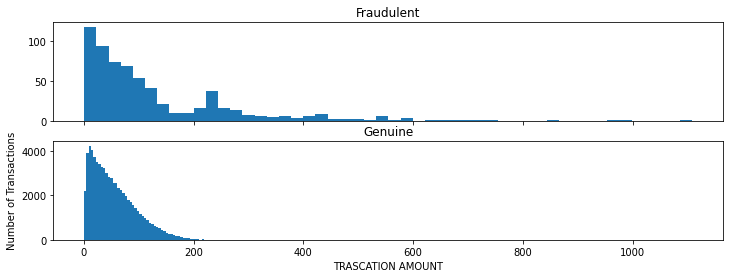

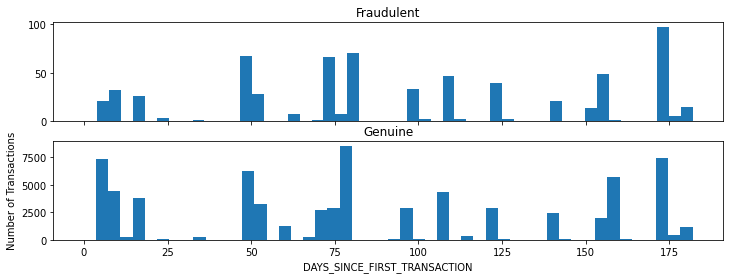

In [33]:
features = ['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

    ax1.hist(df[f][df["FRAUD"] == 1], bins = 50)
    ax1.set_title('Fraudulent')

    ax2.hist(df[f][df["FRAUD"] == 0], bins = 50)
    ax2.set_title('Genuine')

    plt.xlabel(f)
    plt.ylabel('Number of Transactions')
    plt.show()

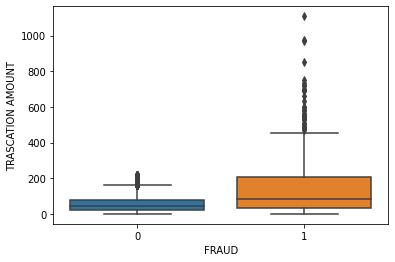

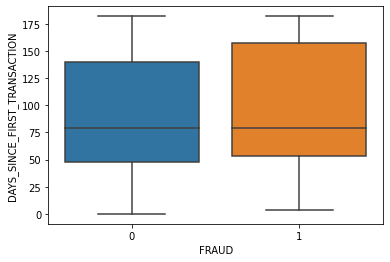

In [34]:
#Boxplot for the features, in order to visualiza the outliers.

features = ['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']
for f in features:
    sns.boxplot(x=df['FRAUD'], y=df[f])
    plt.show()
    

<Figure size 432x288 with 0 Axes>

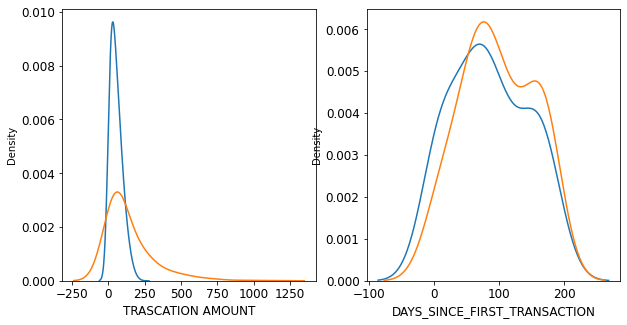

In [35]:
# Plotting all the variable in displot to visualise the distribution
var = ['TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']


i = 0
t0 = df.loc[df['FRAUD'] == 0]
t1 = df.loc[df['FRAUD'] == 1]

plt.figure()
fig, ax = plt.subplots(1,2,figsize=(10,5))

for feature in var:
    i += 1
    plt.subplot(1,2,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="0")
    sns.kdeplot(t1[feature], bw_method=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [36]:
# generate binary values using get_dummies
# features = ["TYPE of TRANSACTION","quarter","weekday_name","month_name"]
df_dum = pd.get_dummies(df, columns=["TYPE of TRANSACTION"],prefix='', prefix_sep='')

df_dum.head()

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
3,2018-08-01 13:58:40,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
4,2018-06-19 4:18:11,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [37]:
df.head()

,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
0,2018-09-20 11:49:41,0,Hotels,88.11,172,0
1,2018-09-20 20:21:57,0,Grocery,78.25,172,0
2,2018-08-01 12:11:36,0,Airways,62.28,122,0
3,2018-08-01 13:58:40,0,Airways,80.16,122,0
4,2018-06-19 4:18:11,0,Insulation,90.07,79,0


<AxesSubplot:>

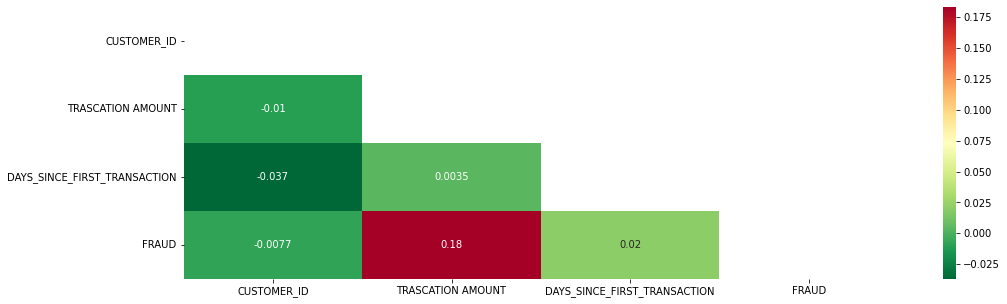

In [38]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap='RdYlGn_r',annot=True, mask=mask)

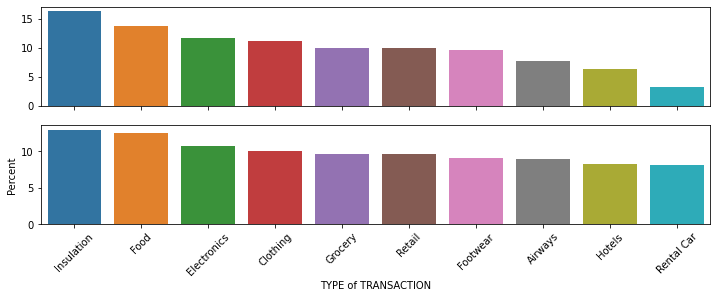

In [39]:
# features = ["TYPE of TRANSACTION", "month_name","quarter","time","weekday_name"]
features = ["TYPE of TRANSACTION"]
for f in features:
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
    
    Feature = df[f][df["FRAUD"] == 1].value_counts(normalize=True).index
    perc = 100*df[f][df["FRAUD"] == 1].value_counts(normalize=True).values

    ax1 = sns.barplot(data=pd.DataFrame({'Feature':Feature, 'Percent':perc}), x='Feature', y='Percent',ax=ax1)

    Feature = df[f][df["FRAUD"] == 0].value_counts(normalize=True).index
    perc = 100*df[f][df["FRAUD"] == 0].value_counts(normalize=True).values
    
    ax2 = sns.barplot(data=pd.DataFrame({'Feature':Feature, 'Percent':perc}), x='Feature', y='Percent',ax=ax2)
    
    
    ax2.set(ylabel=None)
    ax1.set(xlabel=None)
    ax1.set(ylabel=None)
    
    plt.xlabel(f)
    plt.ylabel("Percent")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.show()

vif to check multicollinearity

In [40]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features 
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X = X.copy()
    X["intercept"] = 1

    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [41]:
# # features to consider removing
# considered_features = ["TYPE of TRANSACTION", "month", "quarter","dayofweek","time","weekday_name"]
considered_features = ['CUSTOMER_ID','TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,CUSTOMER_ID,1.001468
2,DAYS_SINCE_FIRST_TRANSACTION,1.001371
1,TRASCATION AMOUNT,1.000119


Splitting the data into test and train

In [42]:
#drop date columns 
# df_dum = df_le.drop(["DATETIME","date","weekday_name"],axis=1)
df_dum = df_dum.drop(["DATETIME"],axis=1)

In [43]:
df_dum.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
1,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
3,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
4,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [44]:
y= df_dum["FRAUD"]
X = df_dum.drop("FRAUD", axis = 1)

In [45]:
X.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,0,88.11,172,0,0,0,0,0,0,1,0,0,0
1,0,78.25,172,0,0,0,0,0,1,0,0,0,0
2,0,62.28,122,1,0,0,0,0,0,0,0,0,0
3,0,80.16,122,1,0,0,0,0,0,0,0,0,0
4,0,90.07,79,0,0,0,0,0,0,0,1,0,0


In [46]:
# from sklearn.preprocessing import MinMaxScaler
# cols_to_norm = ['TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']

# scaler = MinMaxScaler()
# X[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])

In [47]:
# PCA or not
X_scaled = X

In [48]:
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [49]:
X_scaled_df.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,0,88.11,172,0,0,0,0,0,0,1,0,0,0
1,0,78.25,172,0,0,0,0,0,1,0,0,0,0
2,0,62.28,122,1,0,0,0,0,0,0,0,0,0
3,0,80.16,122,1,0,0,0,0,0,0,0,0,0
4,0,90.07,79,0,0,0,0,0,0,0,1,0,0


In [50]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state = 42, stratify=y)

In [51]:
y_train.value_counts(normalize=True)

0    0.990948
1    0.009052
Name: FRAUD, dtype: float64

In [52]:
X_train.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
66129,4968,36.43,53,0,0,0,0,0,1,0,0,0,0
40076,2718,64.12,172,0,0,0,1,0,0,0,0,0,0
52956,3761,37.78,53,0,0,1,0,0,0,0,0,0,0
46752,3230,159.47,140,0,0,0,0,0,0,0,0,1,0
66131,4968,24.55,53,0,0,0,0,0,1,0,0,0,0


# Model Building with Imbalance data

In [53]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [54]:
# ROC Curve function(receiver operating characteristic curve)
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

## 1.Logistic Regression

In [55]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]} # larger C - more prone to overfit
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(max_iter=1000),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.6987227402300645
Best hyperparameters:  {'C': 0.1}


In [56]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.865860,0.158392,0.016756,0.004107,0.01,{'C': 0.01},0.719510,0.690285,0.683433,0.704300,...,0.695445,0.014673,4,0.690992,0.700497,0.700562,0.696811,0.699586,0.697690,0.003616
1,1.584738,0.683129,0.019151,0.004345,0.1,{'C': 0.1},0.726158,0.686804,0.688074,0.708551,...,0.698723,0.016253,1,0.698060,0.709698,0.706795,0.702168,0.704511,0.704247,0.003972
2,0.987276,0.513751,0.017634,0.002958,1,{'C': 1},0.729579,0.687913,0.657037,0.716131,...,0.691828,0.027520,5,0.702513,0.714035,0.693478,0.707646,0.688189,0.701172,0.009348
3,0.786669,0.229815,0.019946,0.004886,10,{'C': 10},0.726240,0.687863,0.681969,0.705154,...,0.697063,0.016719,3,0.698644,0.714145,0.708377,0.700706,0.704743,0.705323,0.005539
4,0.714599,0.153144,0.017484,0.000956,100,{'C': 100},0.726244,0.690298,0.691815,0.694564,...,0.697398,0.014828,2,0.698647,0.707033,0.711394,0.684029,0.704746,0.701170,0.009506
5,0.502567,0.079605,0.011086,0.002877,1000,{'C': 1000},0.718057,0.690302,0.656964,0.694562,...,0.688792,0.019633,6,0.676560,0.707026,0.693736,0.684034,0.704749,0.693221,0.011711


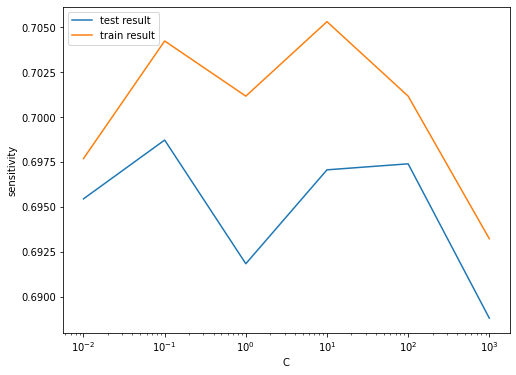

In [57]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [58]:
model_cv.best_params_

{'C': 0.1}

In [59]:
# Instantiating the model
log_reg_imb_model = LogisticRegression(C=0.1,max_iter=1000)

# Fitting the model with train data
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [60]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [61]:

# Printing scores
display_scores(y_train, y_train_pred)

F1 Score: 18.65%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     57476
           1       1.00      0.10      0.19       525

    accuracy                           0.99     58001
   macro avg       1.00      0.55      0.59     58001
weighted avg       0.99      0.99      0.99     58001



In [62]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

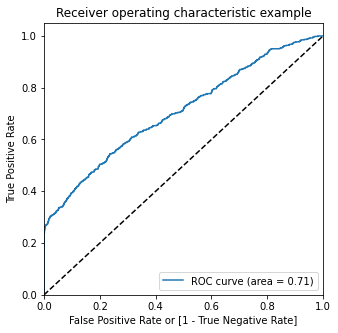

In [63]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [64]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 19.31%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14370
           1       1.00      0.11      0.19       131

    accuracy                           0.99     14501
   macro avg       1.00      0.55      0.59     14501
weighted avg       0.99      0.99      0.99     14501



In [65]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

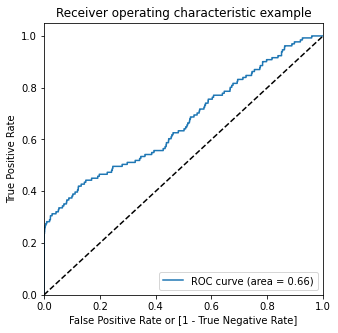

In [66]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 2. Decision Tree

In [67]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [68]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119715,0.005501,0.014862,0.000940,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.699808,0.671128,0.680222,0.683719,0.011967,1
1,0.122642,0.011209,0.015626,0.001696,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.699808,0.671128,0.680222,0.683719,0.011967,1
2,0.134310,0.011054,0.029736,0.010591,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.686384,0.672180,0.687288,0.681951,0.006919,3
3,0.184598,0.025660,0.021613,0.005419,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.686384,0.672180,0.687288,0.681951,0.006919,3
4,0.261999,0.032275,0.013630,0.000470,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.696680,0.633688,0.639236,0.656535,0.028478,6
5,0.229513,0.033985,0.017940,0.003242,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.696705,0.633688,0.644549,0.658314,0.027507,5
6,0.198904,0.004603,0.016395,0.000437,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.654524,0.641639,0.667583,0.654582,0.010591,8
7,0.191025,0.006126,0.012214,0.002720,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.655958,0.641974,0.667583,0.655171,0.010470,7


In [69]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.6837193052460688
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [70]:

# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [71]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 38.71%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     57476
           1       1.00      0.24      0.39       525

    accuracy                           0.99     58001
   macro avg       1.00      0.62      0.69     58001
weighted avg       0.99      0.99      0.99     58001



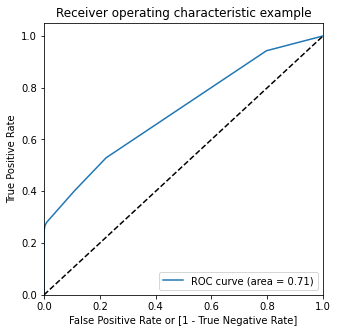

In [72]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [73]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)


F1 Score: 38.27%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14370
           1       1.00      0.24      0.38       131

    accuracy                           0.99     14501
   macro avg       1.00      0.62      0.69     14501
weighted avg       0.99      0.99      0.99     14501



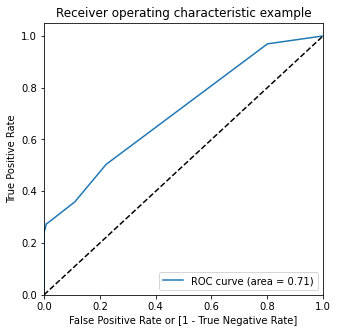

In [74]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 3. XGBoost

In [75]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [76]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.754314,0.039311,0.028883,0.002514,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.688945,0.655745,0.657325,0.667338,0.015292,4,0.837386,0.855307,0.848394,0.847029,0.007380
1,2.229350,0.069120,0.033010,0.006146,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.696876,0.652522,0.679992,0.676463,0.018279,2,0.860365,0.873947,0.873031,0.869114,0.006198
2,2.359791,0.050513,0.032195,0.002393,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.678302,0.663224,0.689326,0.676951,0.010699,1,0.861514,0.885982,0.879451,0.875649,0.010345
3,2.135914,0.036532,0.031720,0.001888,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.670166,0.625979,0.628313,0.641486,0.020302,6,0.862907,0.867326,0.864057,0.864763,0.001872
4,2.498220,0.064530,0.031295,0.004149,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.698725,0.682589,0.643789,0.675034,0.023055,3,0.912834,0.918519,0.915816,0.915723,0.002322
5,2.414456,0.049060,0.033966,0.003458,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.680386,0.659286,0.655676,0.665116,0.010898,5,0.921461,0.931262,0.926317,0.926347,0.004001


In [77]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.6769507934361338
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [78]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [79]:
# Printing best params
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[22:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [80]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 41.39%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     57476
           1       1.00      0.26      0.41       525

    accuracy                           0.99     58001
   macro avg       1.00      0.63      0.71     58001
weighted avg       0.99      0.99      0.99     58001



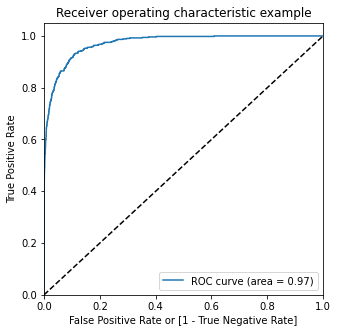

In [81]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [82]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 39.26%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14370
           1       1.00      0.24      0.39       131

    accuracy                           0.99     14501
   macro avg       1.00      0.62      0.69     14501
weighted avg       0.99      0.99      0.99     14501



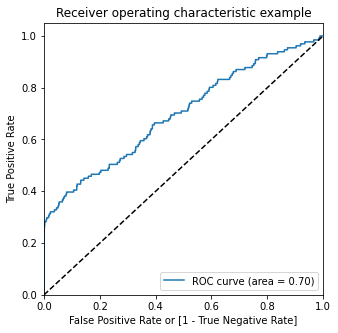

In [93]:
#### Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 4. Random Forest Classifier

In [94]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [95]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.003200,0.395188,0.340297,0.032876,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.706074,0.685003,0.704945,0.698674,0.009678,5
1,3.867385,0.111980,0.319925,0.013656,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.708374,0.680129,0.700244,0.696249,0.011872,7
2,3.848106,0.259024,0.280953,0.023010,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.713129,0.689346,0.702766,0.701747,0.009736,1
3,3.351398,0.187573,0.262597,0.035522,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.712012,0.680410,0.704116,0.698846,0.013429,4
4,5.052353,0.341119,0.411567,0.010481,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.711319,0.690725,0.693898,0.698647,0.009053,6
5,5.471995,0.229733,0.470202,0.047548,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.712096,0.690906,0.694592,0.699198,0.009244,2
6,5.391333,0.167766,0.404804,0.073727,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.711165,0.677602,0.692164,0.693644,0.013742,8
7,5.236240,0.101057,0.300418,0.074370,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.710672,0.687999,0.698371,0.699014,0.009268,3


In [96]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.7017468834962917
RandomForestClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [97]:
# Printing best params
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}

In [98]:
# Model with optimal hyperparameters
rf_imb_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

rf_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [99]:
# Predictions on the train set

y_train_pred = rf_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 37.46%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     57476
           1       1.00      0.23      0.37       525

    accuracy                           0.99     58001
   macro avg       1.00      0.62      0.69     58001
weighted avg       0.99      0.99      0.99     58001



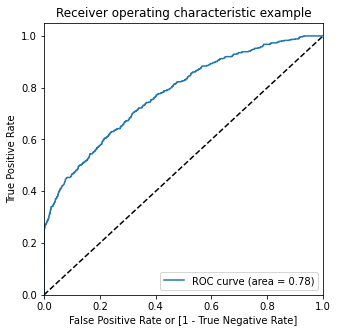

In [100]:
# Predicted probability
y_train_pred_proba_rf = rf_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_rf)

In [101]:
# Predictions on the test set
y_test_pred = rf_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 37.27%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14370
           1       1.00      0.23      0.37       131

    accuracy                           0.99     14501
   macro avg       1.00      0.61      0.68     14501
weighted avg       0.99      0.99      0.99     14501



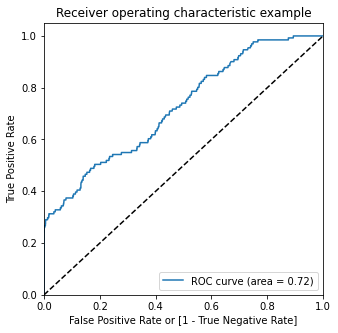

In [102]:
# Predicted probability
y_test_pred_proba = rf_imb_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)